<a href="https://colab.research.google.com/github/ishneha1/AI_CourseWork/blob/main/AI_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**



In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score,learning_curve,validation_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (classification_report,
                            confusion_matrix,
                            accuracy_score,roc_curve, auc, precision_recall_curve, average_precision_score)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from itertools import cycle


# **Loading Dataset and Understanding data**


In [27]:
data = pd.read_csv('/content/Dhaka Obesity.csv')
# Show first 5 rows to understand the data structure
print(data.head())

   Gender  Age  Height (m)  Weight (kg) Family history of overweight  \
0    Male   29        1.65        101.0                          Yes   
1  Female   25        1.65         53.0                           No   
2    Male   23        1.70         70.0                           No   
3    Male   22        1.68        112.0                          Yes   
4    Male   19        1.75         67.0                           No   

  High caloric food consumption Vegetable consumption frequency  \
0                           Yes                       Sometimes   
1                            No                          Always   
2                            No                          Always   
3                           Yes                       Sometimes   
4                           Yes                          Always   

  Daily main meals frequency Between-meal food consumption frequency Smoking  \
0                      Three                              Frequently      No   
1   

# **Data Cleaning**

In [28]:
# Check for missing values
print(data.isnull().sum())
# Remove duplicate rows if any
initial_count = len(data)
data.drop_duplicates(inplace=True)
final_count = len(data)
# Check for impossible values in numerical columns
print(data.describe())

Gender                                     0
Age                                        0
Height (m)                                 0
Weight (kg)                                0
Family history of overweight               0
High caloric food consumption              0
Vegetable consumption frequency            0
Daily main meals frequency                 0
Between-meal food consumption frequency    0
Smoking                                    0
Alcohol intake                             0
Daily water intake                         0
Monitor calories                           0
Physical exercise                          0
Daily device usage duration                0
Mode of transportation                     0
Obesity level                              0
dtype: int64
               Age   Height (m)  Weight (kg)
count  2157.000000  2157.000000  2157.000000
mean     26.766806     1.627144    74.021604
std       8.446704     0.101490    20.787374
min      15.000000     1.220000    35.0000

# **Data Preparation**

#### Distinguishing Numerical And Categorical Columns

In [29]:
for col in data.columns:
    print(f'{col} : {data[col].unique()}')
    print()

Gender : ['Male' 'Female']

Age : [29 25 23 22 19 24 30 16 32 18 26 20 44 21 34 36 28 52 51 37 35 27 40 41
 31 58 46 39 17 59 33 45 15 54 38 50 49 42 48 62 43 61 60 75 53 47 56 55
 57 67 70 65]

Height (m) : [1.65 1.7  1.68 1.75 1.55 1.57 1.83 1.8  1.73 1.63 1.6  1.42 1.52 1.45
 1.4  1.78 1.88 1.37 1.47 1.85 1.35 1.5  1.3  1.32 1.22]

Weight (kg) : [101.   53.   70.  112.   67.   90.   73.  110.   49.   46.   43.   69.
  52.   75.   60.   92.   88.  120.   65.  105.   61.   77.   78.   64.
  51.   91.   45.   47.  107.   82.   80.   96.  104.   62.   98.   94.
  58.  109.   55.  103.   48.   50.   85.   40.   99.   41.  113.   81.
 117.   44.  106.   54.   71.   97.   72.   38.  100.   63.   68.   76.
  93.   86.   89.   95.  115.   42.   56.  116.   74.   87.   79.   59.
  66.  118.  114.   57.   84.  102.  119.   83.  130.  127.  108.   35.
 123.   39.  111.  132.  122.  134.  135.   71.6 138.  125.  126.  150.
 140.  128.   36. ]

Family history of overweight : ['Yes' 'No']

High ca

##### Encoding Categorical Columns


In [30]:
data['Obesity level'] = data['Obesity level'].replace({'Normal_Weight': 1, 'Overweight': 2, 'Obesity_Type_I': 3, 'Obesity_Type_II': 4, 'Obesity_Type_III': 5, 'Insufficient_Weight':0})
data['Mode of transportation'] = data['Mode of transportation'].replace({'Private Car': 2, 'Bike': 2, 'Public Transportation': 1, 'Walking': 0, 'Rickshaw': 1})
data['High caloric food consumption'] = data['High caloric food consumption'].replace({'Yes':1, 'No':0})
data['Monitor calories'] = data['Monitor calories'].replace({'Yes':1, 'No':0})
data['Daily water intake'] = data['Daily water intake'].replace({'Between 1 and 2 L':0.5, 'More than 2 L':0,'Less than a liter':1})
data['Family history of overweight'] = data['Family history of overweight'].replace({'Yes':1, 'No':0})
data['Vegetable consumption frequency'] = data['Vegetable consumption frequency'].replace({'Never':1, 'Sometimes':0.5, 'Always':0})
data['Daily main meals frequency'] = data['Daily main meals frequency'].replace({'More than Three':1, 'Between 1-2':0, 'Three':0.5})
data['Between-meal food consumption frequency'] = data['Between-meal food consumption frequency'].replace({'No':0, 'Sometimes':0.5, 'Frequently':1, 'Always':2})
data['Smoking'] = data['Smoking'].replace({'Yes':1, 'No':0})
data['Alcohol intake'] = data['Alcohol intake'].replace({'I do not drink':0, 'Sometimes':0.5, 'Frequently':1, 'Always':2})
data['Daily device usage duration'] = data['Daily device usage duration'].replace({'More than 5 hours':2, '3-5 hours':1, '0-2 hours':0})
data['Monitor calories'] = data['Monitor calories'].replace({'Yes':1, 'No':0})
data['Physical exercise'] = data['Physical exercise'].replace({'I do not have':1, 'Almost Everyday':0, '2 or 4 days':0, '1 or 2 days':0.5, '4 or 5 days':0})
data['Gender'] = data['Gender'].replace({'Male':1, 'Female':0})

/tmp/ipython-input-30-4245558732.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Obesity level'] = data['Obesity level'].replace({'Normal_Weight': 1, 'Overweight': 2, 'Obesity_Type_I': 3, 'Obesity_Type_II': 4, 'Obesity_Type_III': 5, 'Insufficient_Weight':0})
/tmp/ipython-input-30-4245558732.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Mode of transportation'] = data['Mode of transportation'].replace({'Private Car': 2, 'Bike': 2, 'Public Transportation': 1, 'Walking': 0, 'Rickshaw': 1})
/tmp/ipython-input-30-

#**Data Visualization**

/tmp/ipython-input-31-2396508783.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Obesity level', data=data, palette='viridis')


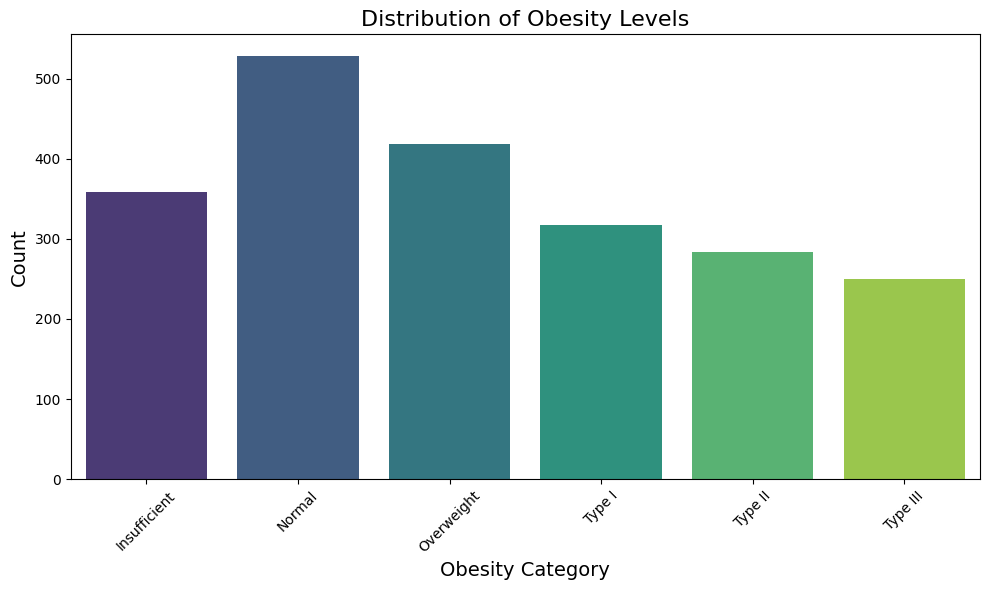

In [31]:
# 1. Distribution of Obesity Levels
plt.figure(figsize=(10, 6))
sns.countplot(x='Obesity level', data=data, palette='viridis')
plt.title('Distribution of Obesity Levels', fontsize=16)
plt.xlabel('Obesity Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0,1,2,3,4,5],
           labels=['Insufficient', 'Normal', 'Overweight',
                   'Type I', 'Type II', 'Type III'],
           rotation=45)
plt.tight_layout()
plt.savefig('obesity_distribution.png')
plt.show()


/tmp/ipython-input-32-400846374.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')


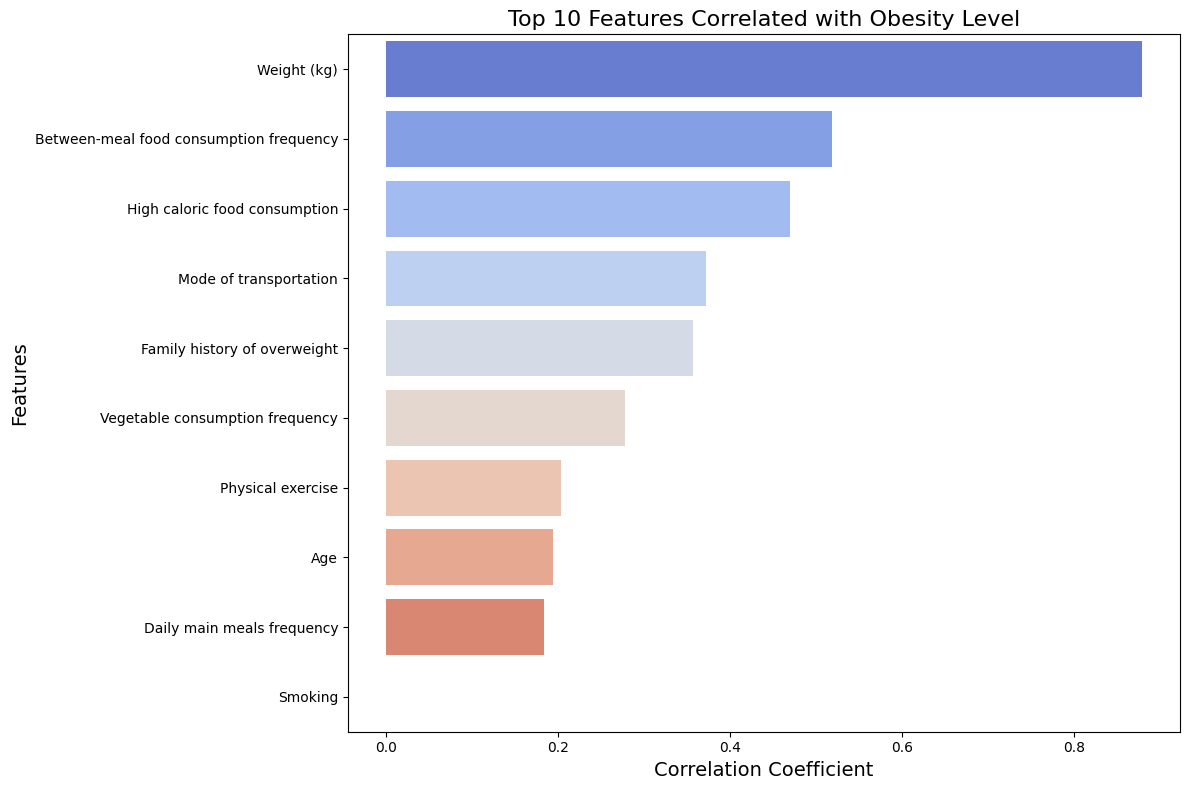

In [32]:
# 2. Correlation Heatmap (Top 10 features)
plt.figure(figsize=(12, 8))
corr = data.corr()['Obesity level'].sort_values(ascending=False)[1:11]
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.title('Top 10 Features Correlated with Obesity Level', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.savefig('feature_correlation.png')
plt.show()

# **Input Features as X**

In [33]:
X = data.iloc[:, 0:-1]
X

,Gender,Age,Height (m),Weight (kg),Family history of overweight,High caloric food consumption,Vegetable consumption frequency,Daily main meals frequency,Between-meal food consumption frequency,Smoking,Alcohol intake,Daily water intake,Monitor calories,Physical exercise,Daily device usage duration,Mode of transportation
0,1,29,1.65,101.0,1,1,0.5,0.5,1.0,0,0.0,0.5,0,1.0,2,2
1,0,25,1.65,53.0,0,0,0.0,0.5,2.0,0,0.0,0.5,0,0.0,2,1
2,1,23,1.70,70.0,0,0,0.0,0.0,0.5,1,0.5,1.0,0,1.0,2,1
3,1,22,1.68,112.0,1,1,0.5,0.5,1.0,0,0.0,0.5,0,1.0,2,1
4,1,19,1.75,67.0,0,1,0.0,0.5,0.5,1,0.0,0.5,0,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,1,18,1.63,41.0,0,0,0.5,0.5,0.5,0,0.0,0.5,0,1.0,2,1
2178,1,22,1.60,118.0,1,1,1.0,0.5,1.0,0,0.0,0.5,0,1.0,2,2
2179,1,24,1.75,79.0,1,1,0.0,0.0,0.0,0,0.0,0.0,1,0.0,2,2
2180,1,28,1.68,88.0,1,1,0.5,0.0,0.5,0,0.0,0.5,0,1.0,2,1


# **Target variable as y**

In [34]:
y = data.iloc[:, -1]
y

,Obesity level
0,4
1,1
2,1
3,4
4,1
...,...
2177,0
2178,5
2179,2
2180,3


# **Splitting Dataset into training and testing**

In [35]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


# **Creating and Training Model**

In [36]:
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,              # Limits tree depth
    random_state=42,           # For reproducibility
)

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

#**Evaluating Model**

In [37]:
# Make predictions
y_pred = model.predict(X_test)

#### Classification Report

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       0.97      0.95      0.96       106
           2       0.96      0.94      0.95        84
           3       0.92      0.97      0.95        63
           4       0.92      0.84      0.88        57
           5       0.89      0.94      0.91        50

    accuracy                           0.94       432
   macro avg       0.94      0.94      0.94       432
weighted avg       0.94      0.94      0.94       432



####Cross Validation

In [39]:
print("\nCross-Validation Results:")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))


Cross-Validation Results:
Cross-validation scores: [0.91435185 0.92361111 0.95823666 0.95823666 0.91647332]
Mean CV accuracy: 0.9341819197387643
Standard deviation: 0.019878778247811143


#### Confusion Matrix


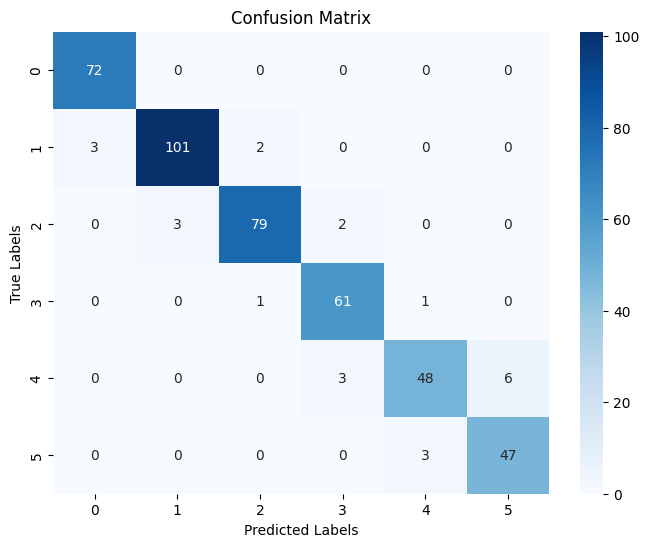

In [40]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

####  Accuracy Score

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy}")


Model Accuracy: 0.9444444444444444


# **Model Interpretation**

#### Visualization of Decision Tree


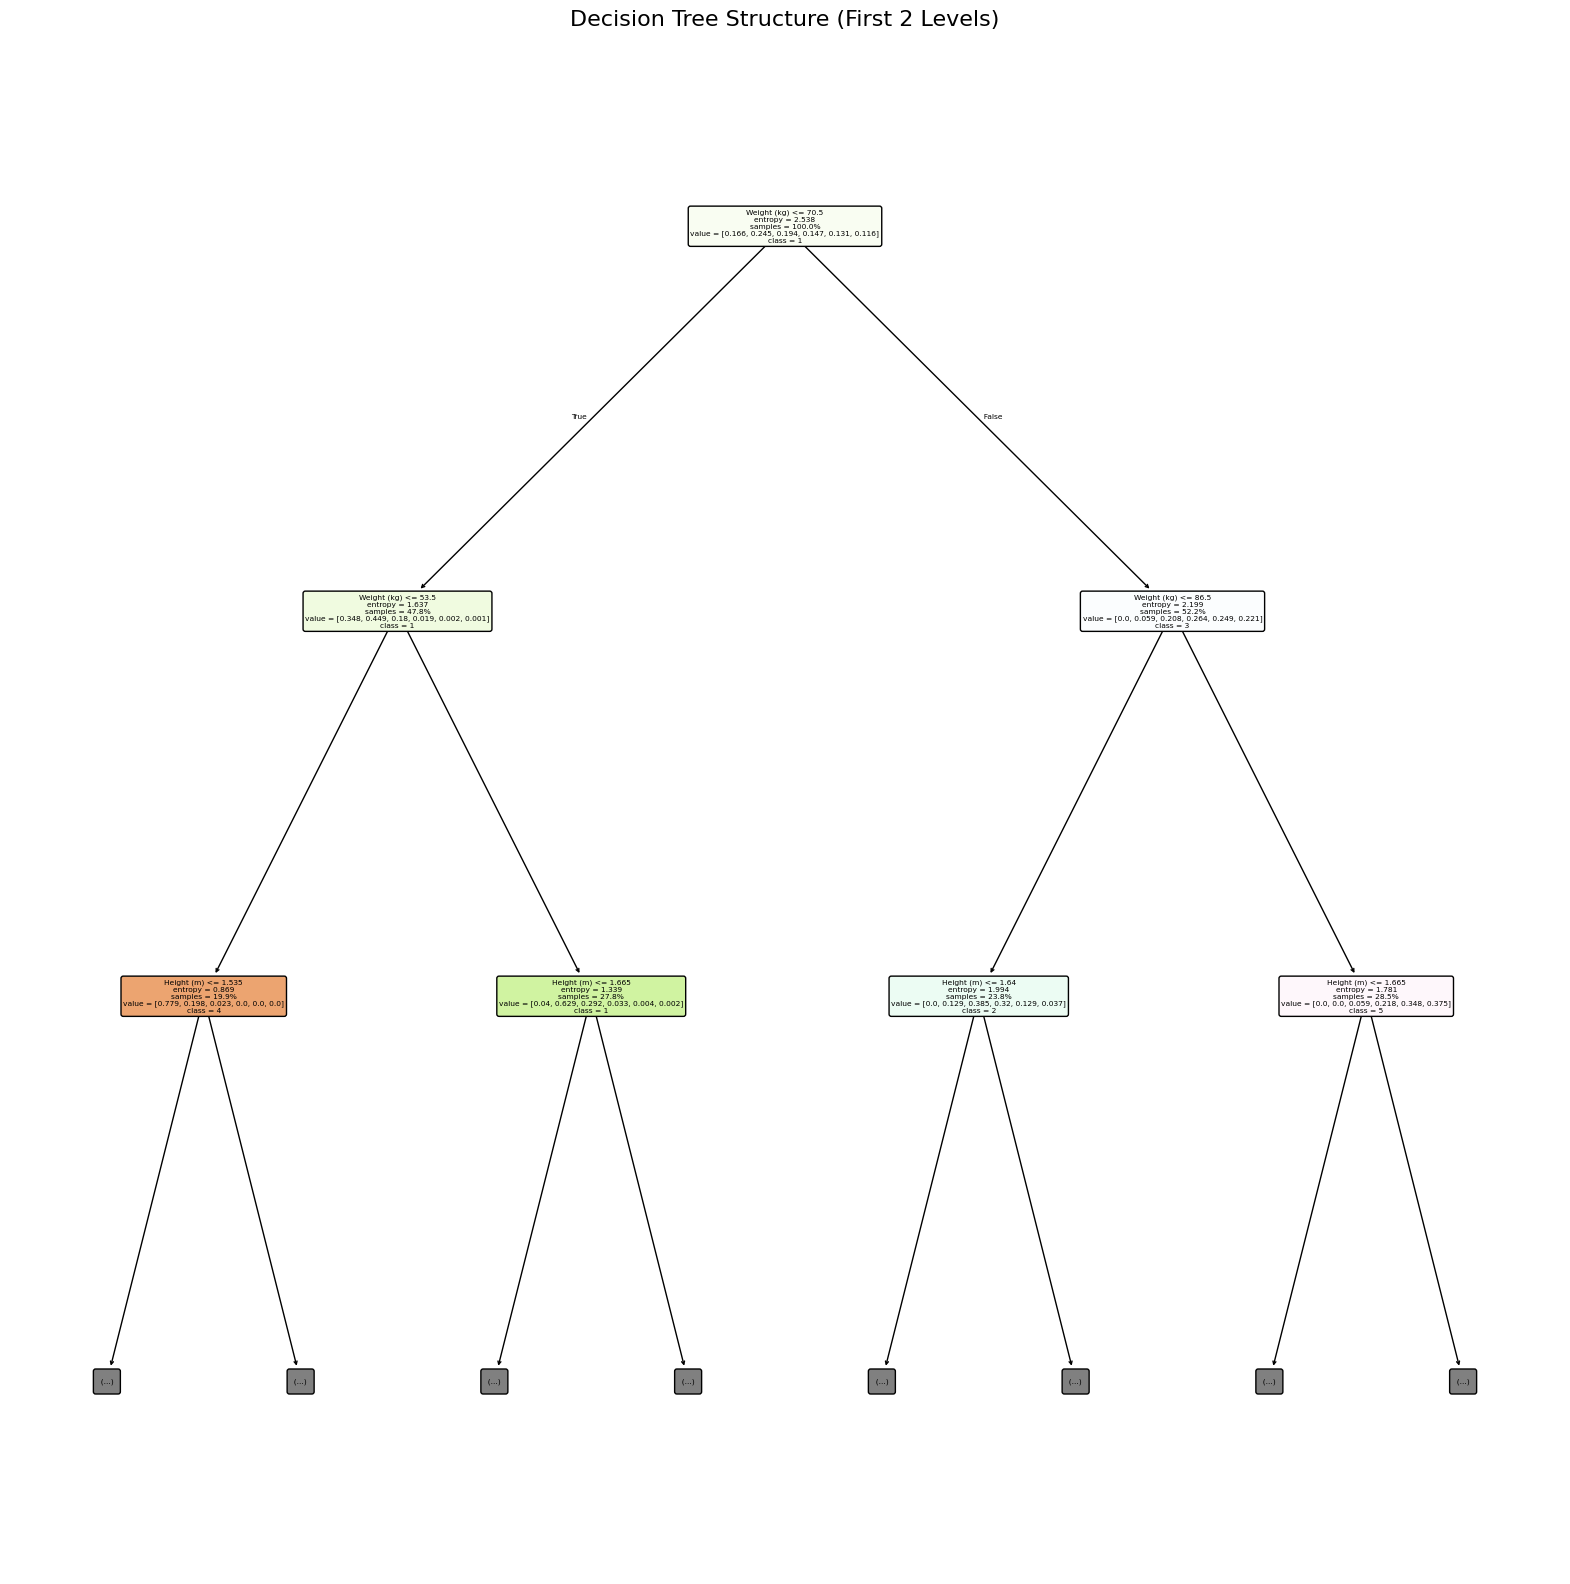

In [42]:
plt.figure(figsize=(20, 20))
plot_tree(model,
          filled=True,
          feature_names=X.columns,
          class_names=[str(c) for c in y.unique()],
          rounded=True,
          proportion=True,
          max_depth=2)  # Only show first 2 levels for clarity
plt.title("Decision Tree Structure (First 2 Levels)", fontsize=16)
plt.savefig('decision_tree.png')
plt.show()

#### Feature Importance

In [43]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nMost Important Features:")
print(importance.head(10))


Most Important Features:
                                    Feature  Importance
3                               Weight (kg)    0.599585
2                                Height (m)    0.353663
6           Vegetable consumption frequency    0.018827
8   Between-meal food consumption frequency    0.004889
5             High caloric food consumption    0.003600
1                                       Age    0.003483
7                Daily main meals frequency    0.003351
13                        Physical exercise    0.003191
4              Family history of overweight    0.002399
14              Daily device usage duration    0.002399


####Feature Importance Visualization

/tmp/ipython-input-53-3151121442.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance.head(10), palette='viridis')


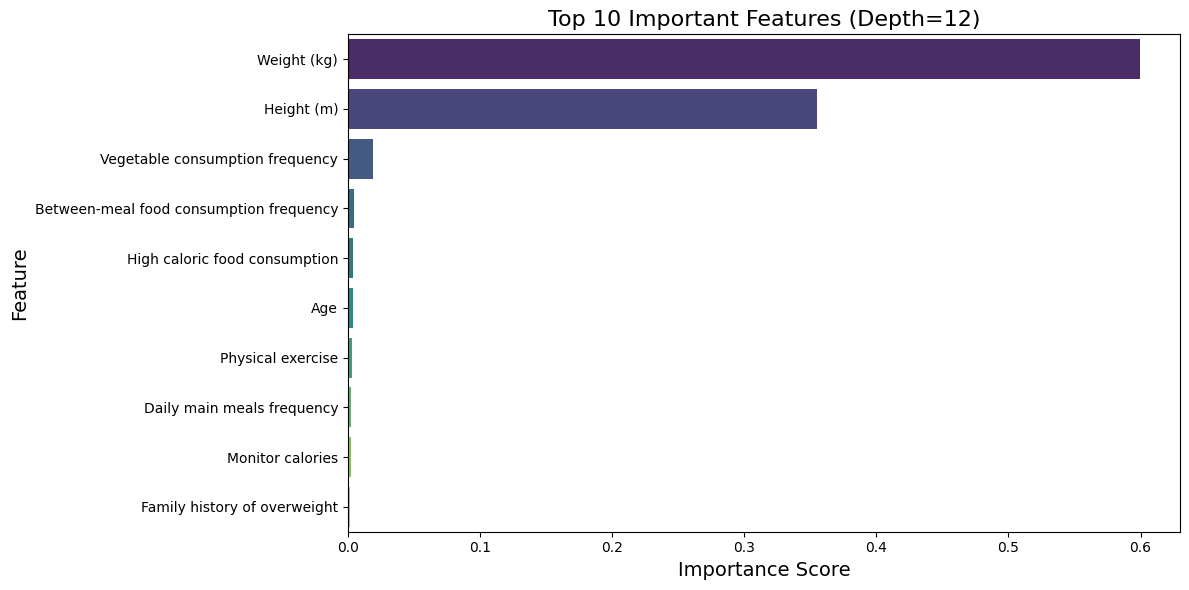

In [53]:
# Train model with optimal depth
optimal_model = DecisionTreeClassifier(
    max_depth=optimal_depth,
    criterion='entropy',
    random_state=42
)
optimal_model.fit(X_train, y_train)

# Feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': optimal_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance.head(10), palette='viridis')
plt.title(f'Top 10 Important Features (Depth={optimal_depth})', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.savefig('feature_importance_optimal.png', dpi=300)
plt.show()


#### Learning Curve

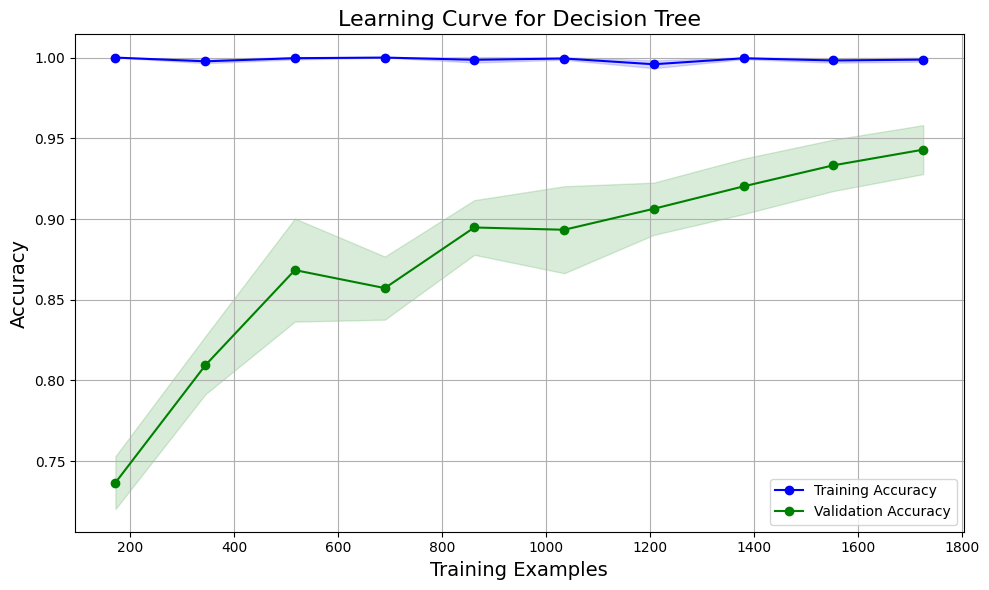

In [45]:
plt.figure(figsize=(10, 6))
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.title('Learning Curve for Decision Tree', fontsize=16)
plt.xlabel('Training Examples', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.savefig('learning_curve.png')
plt.show()

#### ROC Curve

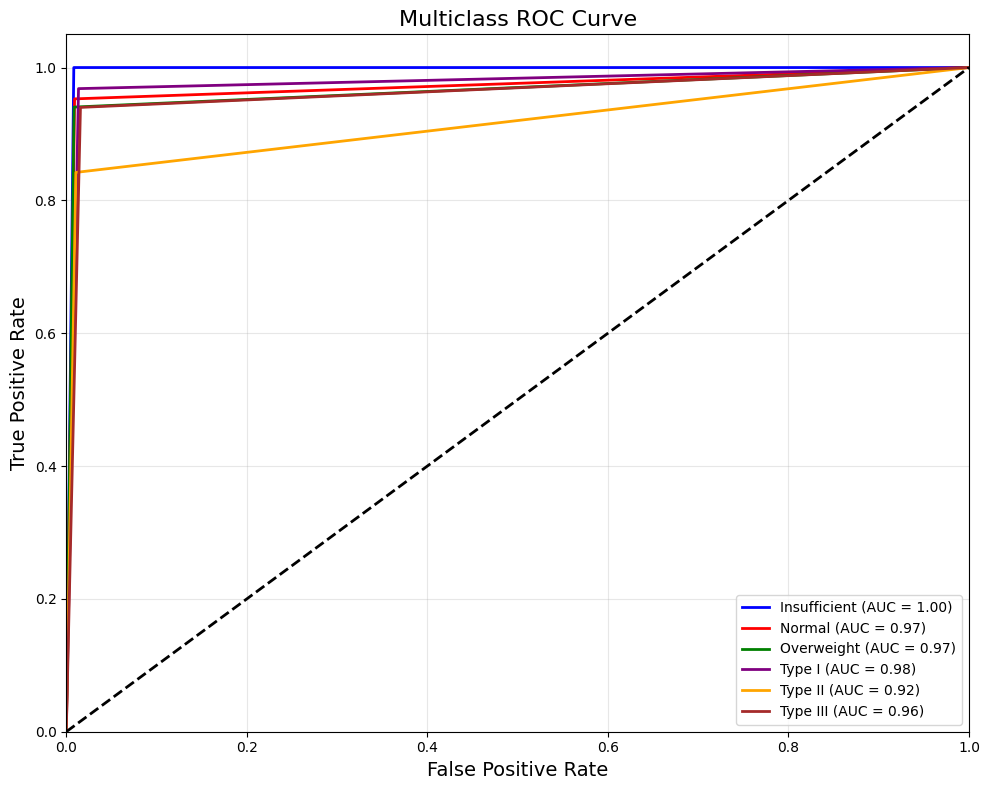

In [46]:
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'brown'])
class_names = ['Insufficient', 'Normal', 'Overweight',
              'Type I', 'Type II', 'Type III']

for i, color, class_name in zip(range(n_classes), colors, class_names):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='{0} (AUC = {1:0.2f})'
             ''.format(class_name, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Multiclass ROC Curve', fontsize=16)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=300)
plt.show()


####Precision-Recall Curve

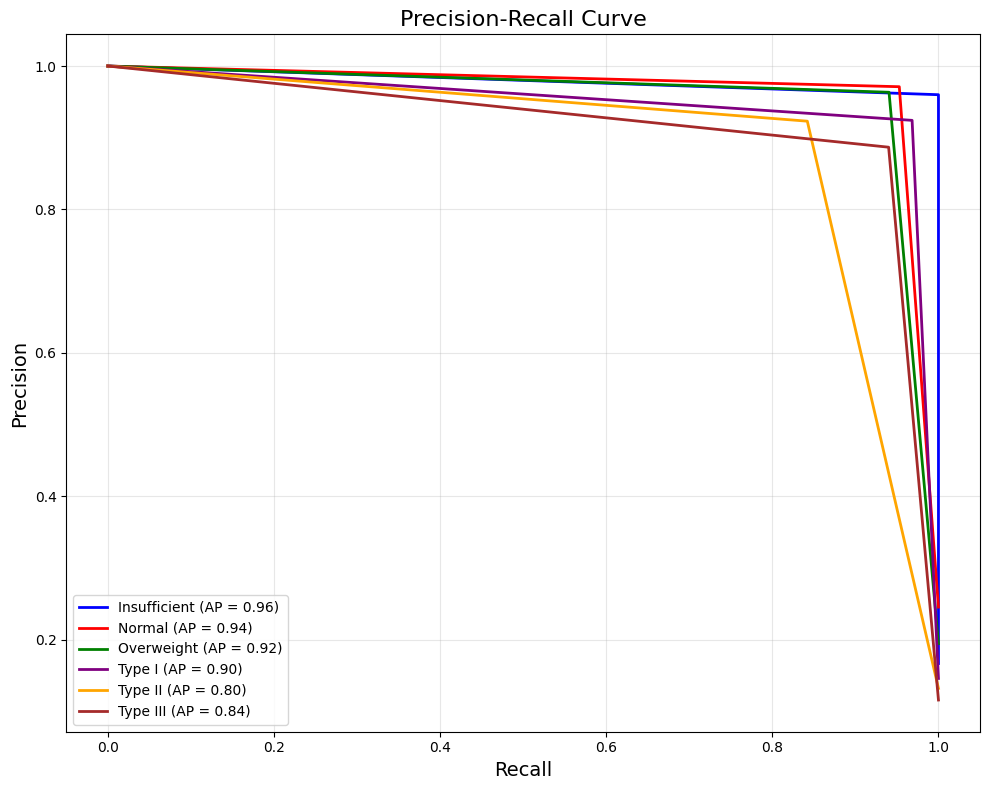

In [47]:
precision, recall, average_precision = dict(), dict(), dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_bin[:, i])

plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange', 'brown'])

for i, color, class_name in zip(range(n_classes), colors, class_names):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='{0} (AP = {1:0.2f})'
             ''.format(class_name, average_precision[i]))

plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(loc="best")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('pr_curve.png', dpi=300)
plt.show()


#### Cross-Validation Accuracy Curve

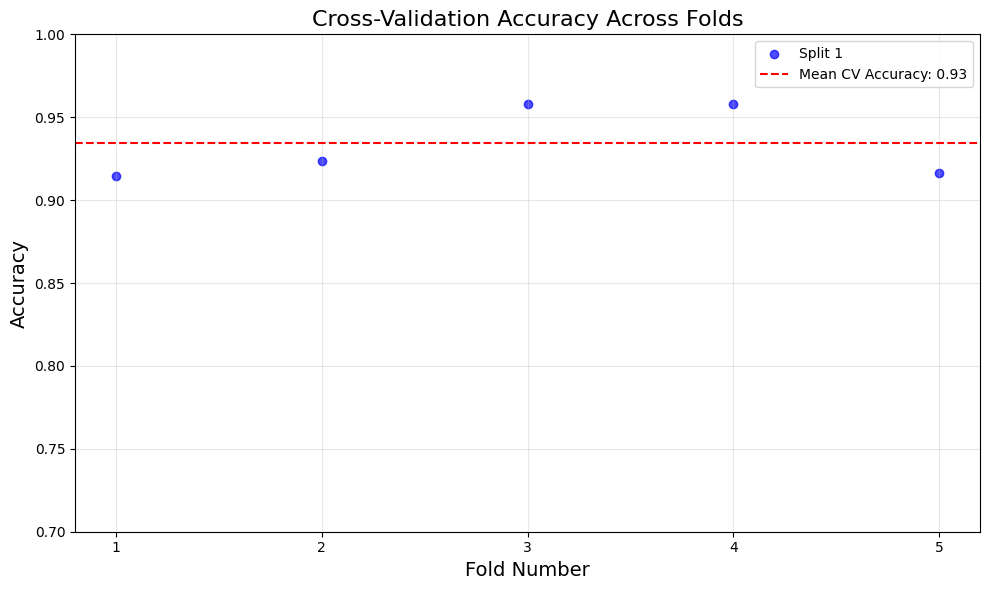

In [50]:
plt.figure(figsize=(10, 6))
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Plot individual CV splits
for i, (train_idx, val_idx) in enumerate(cv.split(X, y)):
    model.fit(X.iloc[train_idx], y.iloc[train_idx])
    val_acc = model.score(X.iloc[val_idx], y.iloc[val_idx])
    plt.scatter(i+1, val_acc, color='blue', alpha=0.7, label=f'Split {i+1}' if i == 0 else "")

# Plot mean CV accuracy
mean_cv = np.mean(cv_scores)
plt.axhline(mean_cv, color='red', linestyle='--',
            label=f'Mean CV Accuracy: {mean_cv:.2f}')

plt.title('Cross-Validation Accuracy Across Folds', fontsize=16)
plt.xlabel('Fold Number', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(range(1, 6))
plt.ylim(0.7, 1.0)
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('cv_accuracy_curve.png', dpi=300)
plt.show()


#### Train-Test Accuracy Vs Tree Depth

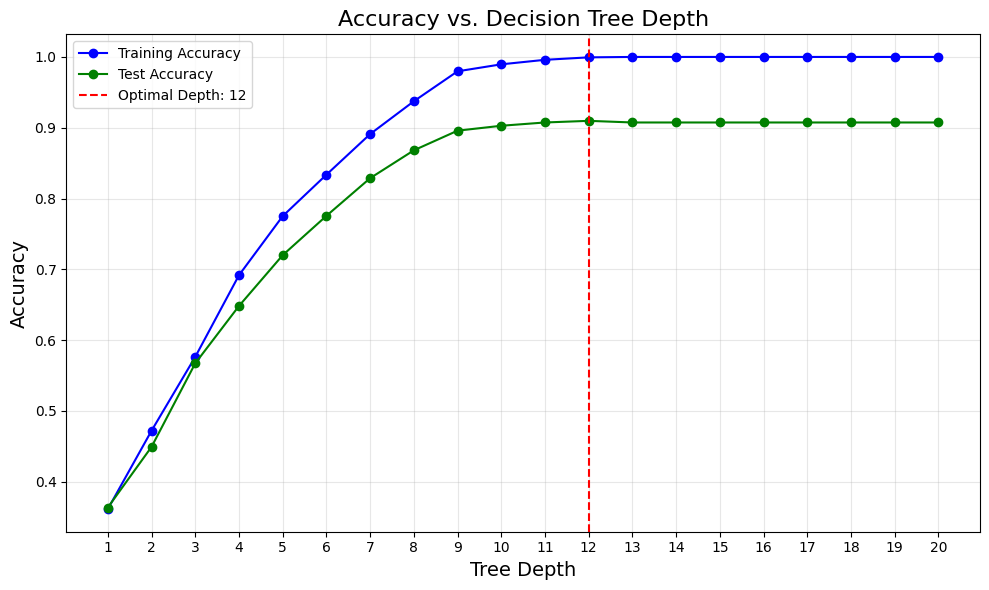

In [51]:
max_depths = np.arange(1, 21)
train_acc = []
test_acc = []

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_acc.append(dt.score(X_train, y_train))
    test_acc.append(dt.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_acc, 'o-', color='blue', label='Training Accuracy')
plt.plot(max_depths, test_acc, 'o-', color='green', label='Test Accuracy')

# Mark the optimal depth
optimal_depth = max_depths[np.argmax(test_acc)]
plt.axvline(x=optimal_depth, color='red', linestyle='--',
            label=f'Optimal Depth: {optimal_depth}')

plt.title('Accuracy vs. Decision Tree Depth', fontsize=16)
plt.xlabel('Tree Depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(max_depths)
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('accuracy_vs_depth.png', dpi=300)
plt.show()